  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting content/cifar-10-python.tar.gz to content
Files already downloaded and verified


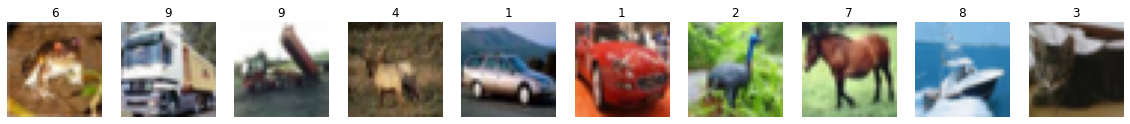

In [3]:
# Load dataset in Pytorch dataset class

from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

trainset = datasets.CIFAR10("content", train=True,  download=True)
testset = datasets.CIFAR10("content", train = False, download=True)

# Display some samples
for j in range(10):
  image, class_num = trainset[j]
  plt.subplot(1, 10 ,j+1)
  plt.imshow(image)
  plt.axis('off')
  plt.title(str(class_num))

In [4]:
# Validation function. Don't cahnge it
def validate(model,testloader):
  correct = 0
  total = 0
  with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
  
  return correct / total

In [5]:
import torch.nn as nn
import torch
import torch.nn.functional as F

class TwoLayerFCN(nn.Module):

    def __init__(self, class_nums = 10):
        super(TwoLayerFCN, self).__init__()
        # Define two layer fully - connected network with linear layers: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear
        self.func =  F.relu
        self.layer1 = nn.Linear(3072, 100)
        self.layer2 = nn.Linear(100, class_nums)

        # Put your code here

    def forward(self, x):
        # Preprocess image, remember that first dimension is batch dimension !

        # Perform forward pass;
        # Use layers defined in constructor;
        # Add activation function on your choice: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity
        
        # Put your code here
        x = torch.flatten(x, 1)
        scores_l1 = self.layer1(x)
        activation = self.func(scores_l1)
        scores = self.layer2(activation)
        
        # return raw output of last layer
        return scores


In [6]:
# Prepare the data
transform=transforms.Compose([
                              transforms.ToTensor(), # Pil Image to Pytorch tensor
                              transforms.Normalize((0.491, 0.482, 0.446), (0.247, 0.243, 0.261)) # https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Normalize
                              ])

trainset.transform = transform
testset.transform = transform

train_loader = DataLoader(trainset, batch_size = 512, shuffle = True)
test_loader = DataLoader(testset, batch_size = 256, shuffle = False)



In [31]:
# Train the model
# You may change loss function, learning rate and number of epochs

model = TwoLayerFCN(10) 
model.train()

# By default cross-entropy loss used, you can change it to another loss function
criterion = nn.CrossEntropyLoss() 

# You can change learning rate and number of epoch too
optimizer = torch.optim.SGD(model.parameters(), lr=0.005) 
for epoch in range(25):
  for img_batch, labels_batch in train_loader:
    
    output = model(img_batch)
    loss = criterion(output, labels_batch)
    # Get the grad and update model weights: https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#backprop
    
    # Put your code here
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

  accuracy = validate(model,test_loader)
  print("Epoch {} Loss {:.2f} Accuracy {:.2f}".format(epoch,loss.item(),accuracy))
  

Epoch 0 Loss 2.04 Accuracy 0.30
Epoch 1 Loss 1.89 Accuracy 0.34
Epoch 2 Loss 1.91 Accuracy 0.36
Epoch 3 Loss 1.82 Accuracy 0.38
Epoch 4 Loss 1.78 Accuracy 0.39
Epoch 5 Loss 1.72 Accuracy 0.40
Epoch 6 Loss 1.71 Accuracy 0.40
Epoch 7 Loss 1.67 Accuracy 0.41
Epoch 8 Loss 1.60 Accuracy 0.42
Epoch 9 Loss 1.63 Accuracy 0.42
Epoch 10 Loss 1.68 Accuracy 0.43
Epoch 11 Loss 1.70 Accuracy 0.43
Epoch 12 Loss 1.59 Accuracy 0.44
Epoch 13 Loss 1.61 Accuracy 0.44
Epoch 14 Loss 1.60 Accuracy 0.44
Epoch 15 Loss 1.61 Accuracy 0.45
Epoch 16 Loss 1.66 Accuracy 0.45
Epoch 17 Loss 1.50 Accuracy 0.45
Epoch 18 Loss 1.59 Accuracy 0.45
Epoch 19 Loss 1.67 Accuracy 0.46
Epoch 20 Loss 1.53 Accuracy 0.46
Epoch 21 Loss 1.52 Accuracy 0.46
Epoch 22 Loss 1.51 Accuracy 0.46
Epoch 23 Loss 1.56 Accuracy 0.46
Epoch 24 Loss 1.47 Accuracy 0.46


Двухслойная сеть с числом нейронов первого уровня = 100 показывает в целом сносные результаты. Лучшая accuracy = 0.46. Но стоит поменять некоторые параметры, чтобы улучшить показатели, что-то мне подсказывает, что можно лучше.

## Ideas for extra work

* ☑Compare different optimizators 
* ☑Compare different Activation functions
* Evaluate Batch Normalization effect (need a deeper network) 

In [7]:
class TwoLayerFCNUpgrade(nn.Module):

    def __init__(self, class_nums = 10, neurons = 100, func = F.relu):
        super(TwoLayerFCNUpgrade, self).__init__()
        # Define two layer fully - connected network with linear layers: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear
        self.func =  func
        self.layer1 = nn.Linear(3072, neurons)
        self.layer2 = nn.Linear(neurons, class_nums)

        # Put your code here

    def forward(self, x):
        # Preprocess image, remember that first dimension is batch dimension !

        # Perform forward pass;
        # Use layers defined in constructor;
        # Add activation function on your choice: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity
        
        # Put your code here
        x = torch.flatten(x, 1)
        scores_l1 = self.layer1(x)
        activation = self.func(scores_l1)
        scores = self.layer2(activation)
        
        # return raw output of last layer
        return scores


In [41]:
# сделаем несколько моделей с разными параметрами и посмотрим, как они себя ведут
# самодельный гридсерч, потому что не очень понятно, как обернуть нейросеть в обычный гридсерч
# вероятно этот код будет работать просто вечность...
neurons = [100, 300, 500, 700]
funcs = [F.relu, F.sigmoid, F.tanh]
lrs = [0.001, 0.01, 0.1]

local_best = []
best_accuracy = 0
best_model = TwoLayerFCNUpgrade(10) 

for neuron in neurons:
  for func in funcs:
    for lr in lrs:
      model = TwoLayerFCNUpgrade(10, neuron, func) 
      model.train()
      
      local_best_accuracy = 0
      best_epoch = 0

      # By default cross-entropy loss used, you can change it to another loss function
      criterion = nn.CrossEntropyLoss() 
      # You can change learning rate and number of epoch too
      optimizer = torch.optim.SGD(model.parameters(), lr=lr) 
      print("Model with {} neurons, {} function and {} learning rate".format(neuron, func, lr))

      for epoch in range(25):
        for img_batch, labels_batch in train_loader:
    
          output = model(img_batch)
          loss = criterion(output, labels_batch)
          # Get the grad and update model weights: https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#backprop
    
          # Put your code here
          optimizer.zero_grad()
          loss.backward()
          optimizer.step() 

        accuracy = validate(model,test_loader)
        if accuracy > local_best_accuracy:
          local_best_accuracy = accuracy
          best_epoch = epoch
        if accuracy > best_accuracy:
          best_accuracy = accuracy
          best_model = model
        print("Epoch {} Loss {:.2f} Accuracy {:.2f}".format(epoch,loss.item(),accuracy))

      print("Best for model is {} in epoch {}".format(local_best_accuracy, best_epoch))

    

print("Best accuracy {}".format(best_accuracy))

Model with 100 neurons, <function relu at 0x7f412bf2be60> function and 0.001 learning rate
Epoch 0 Loss 2.17 Accuracy 0.22
Epoch 1 Loss 2.11 Accuracy 0.26
Epoch 2 Loss 2.07 Accuracy 0.28
Epoch 3 Loss 2.06 Accuracy 0.30
Epoch 4 Loss 1.98 Accuracy 0.31
Epoch 5 Loss 1.99 Accuracy 0.32
Epoch 6 Loss 1.90 Accuracy 0.33
Epoch 7 Loss 1.88 Accuracy 0.34
Epoch 8 Loss 1.99 Accuracy 0.34
Epoch 9 Loss 1.90 Accuracy 0.35
Epoch 10 Loss 1.92 Accuracy 0.35
Epoch 11 Loss 1.90 Accuracy 0.36
Epoch 12 Loss 1.87 Accuracy 0.36
Epoch 13 Loss 1.87 Accuracy 0.37
Epoch 14 Loss 1.84 Accuracy 0.37
Epoch 15 Loss 1.84 Accuracy 0.37
Epoch 16 Loss 1.79 Accuracy 0.37
Epoch 17 Loss 1.78 Accuracy 0.38
Epoch 18 Loss 1.81 Accuracy 0.38
Epoch 19 Loss 1.79 Accuracy 0.38
Epoch 20 Loss 1.75 Accuracy 0.39
Epoch 21 Loss 1.83 Accuracy 0.39
Epoch 22 Loss 1.71 Accuracy 0.39
Epoch 23 Loss 1.74 Accuracy 0.39
Epoch 24 Loss 1.82 Accuracy 0.39
Best for model is 0.3929 in epoch 24
Model with 100 neurons, <function relu at 0x7f412bf2be60>

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 0 Loss 2.31 Accuracy 0.11
Epoch 1 Loss 2.27 Accuracy 0.16
Epoch 2 Loss 2.22 Accuracy 0.19
Epoch 3 Loss 2.21 Accuracy 0.21
Epoch 4 Loss 2.18 Accuracy 0.22
Epoch 5 Loss 2.19 Accuracy 0.23
Epoch 6 Loss 2.14 Accuracy 0.24
Epoch 7 Loss 2.17 Accuracy 0.25
Epoch 8 Loss 2.16 Accuracy 0.26
Epoch 9 Loss 2.15 Accuracy 0.27
Epoch 10 Loss 2.11 Accuracy 0.28
Epoch 11 Loss 2.12 Accuracy 0.28
Epoch 12 Loss 2.11 Accuracy 0.28
Epoch 13 Loss 2.14 Accuracy 0.29
Epoch 14 Loss 2.11 Accuracy 0.29
Epoch 15 Loss 2.08 Accuracy 0.30
Epoch 16 Loss 2.07 Accuracy 0.30
Epoch 17 Loss 2.07 Accuracy 0.30
Epoch 18 Loss 2.07 Accuracy 0.30
Epoch 19 Loss 2.10 Accuracy 0.30
Epoch 20 Loss 2.06 Accuracy 0.31
Epoch 21 Loss 2.07 Accuracy 0.31
Epoch 22 Loss 2.04 Accuracy 0.31
Epoch 23 Loss 2.02 Accuracy 0.31
Epoch 24 Loss 2.03 Accuracy 0.31
Best for model is 0.314 in epoch 24
Model with 100 neurons, <function sigmoid at 0x7f412beae830> function and 0.01 learning rate
Epoch 0 Loss 2.12 Accuracy 0.28
Epoch 1 Loss 2.10 Accura

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch 0 Loss 2.09 Accuracy 0.24
Epoch 1 Loss 2.08 Accuracy 0.27
Epoch 2 Loss 2.00 Accuracy 0.30
Epoch 3 Loss 1.97 Accuracy 0.31
Epoch 4 Loss 1.98 Accuracy 0.32
Epoch 5 Loss 1.99 Accuracy 0.33
Epoch 6 Loss 1.92 Accuracy 0.34
Epoch 7 Loss 1.93 Accuracy 0.34
Epoch 8 Loss 1.91 Accuracy 0.35
Epoch 9 Loss 1.90 Accuracy 0.35
Epoch 10 Loss 1.98 Accuracy 0.36
Epoch 11 Loss 1.91 Accuracy 0.36
Epoch 12 Loss 1.88 Accuracy 0.36
Epoch 13 Loss 1.88 Accuracy 0.36
Epoch 14 Loss 1.89 Accuracy 0.36
Epoch 15 Loss 1.86 Accuracy 0.37
Epoch 16 Loss 1.80 Accuracy 0.37
Epoch 17 Loss 1.75 Accuracy 0.37
Epoch 18 Loss 1.81 Accuracy 0.37
Epoch 19 Loss 1.80 Accuracy 0.37
Epoch 20 Loss 1.88 Accuracy 0.38
Epoch 21 Loss 1.82 Accuracy 0.38
Epoch 22 Loss 1.88 Accuracy 0.38
Epoch 23 Loss 1.79 Accuracy 0.38
Epoch 24 Loss 1.77 Accuracy 0.38
Best for model is 0.3793 in epoch 24
Model with 100 neurons, <function tanh at 0x7f412beae7a0> function and 0.01 learning rate
Epoch 0 Loss 1.91 Accuracy 0.35
Epoch 1 Loss 1.80 Accuracy

Лучший результат - 0.5471, он был у модели с 700 нейронами, функцией активации ReLU и learning rate 0.1 на 23 эпохе (это показывает также, что в целом 25 - вполне достаточно. Для некоторых других моделей стабильные результаты достигаются уже около 10-15 эпохи).
В целом результаты показывают, например, что 100 нейронов - это мало, как и lr 0.001. Также глобально ReLU кажется показывает более хорошие результаты.

In [8]:
# теперь сделаем разные оптимизаторы, зная лучшую модель
# SGD
model = TwoLayerFCNUpgrade(10, 700) 
model.train()

# By default cross-entropy loss used, you can change it to another loss function
criterion = nn.CrossEntropyLoss() 

# You can change learning rate and number of epoch too
optimizer = torch.optim.SGD(model.parameters(), lr=0.1) 
SGDaccuracies = []
SGDbest = 0

for epoch in range(25):
  for img_batch, labels_batch in train_loader:
    
    output = model(img_batch)
    loss = criterion(output, labels_batch)
    # Get the grad and update model weights: https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#backprop
    
    # Put your code here
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

  accuracy = validate(model,test_loader)
  if accuracy > SGDbest:
    SGDbest = accuracy
  SGDaccuracies.append(accuracy)
  print("Epoch {} Loss {:.2f} Accuracy {:.2f}".format(epoch,loss.item(),accuracy))
print("Best for SGD {}".format(SGDbest))

Epoch 0 Loss 1.64 Accuracy 0.42
Epoch 1 Loss 1.40 Accuracy 0.47
Epoch 2 Loss 1.37 Accuracy 0.49
Epoch 3 Loss 1.57 Accuracy 0.47
Epoch 4 Loss 1.25 Accuracy 0.50
Epoch 5 Loss 1.24 Accuracy 0.51
Epoch 6 Loss 1.37 Accuracy 0.49
Epoch 7 Loss 1.27 Accuracy 0.53
Epoch 8 Loss 2.17 Accuracy 0.47
Epoch 9 Loss 1.34 Accuracy 0.46
Epoch 10 Loss 1.08 Accuracy 0.50
Epoch 11 Loss 1.35 Accuracy 0.51
Epoch 12 Loss 1.24 Accuracy 0.48
Epoch 13 Loss 1.26 Accuracy 0.50
Epoch 14 Loss 1.71 Accuracy 0.43
Epoch 15 Loss 0.91 Accuracy 0.54
Epoch 16 Loss 1.25 Accuracy 0.50
Epoch 17 Loss 1.23 Accuracy 0.49
Epoch 18 Loss 1.19 Accuracy 0.49
Epoch 19 Loss 1.00 Accuracy 0.53
Epoch 20 Loss 1.21 Accuracy 0.49
Epoch 21 Loss 0.81 Accuracy 0.54
Epoch 22 Loss 0.86 Accuracy 0.53
Epoch 23 Loss 0.98 Accuracy 0.51
Epoch 24 Loss 0.87 Accuracy 0.51
Best for SGD 0.5404


In [10]:
# RMSProp

model = TwoLayerFCNUpgrade(10, 700) 
model.train()

# By default cross-entropy loss used, you can change it to another loss function
criterion = nn.CrossEntropyLoss() 

# You can change learning rate and number of epoch too
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.1) 
RMSPropaccuracies = []
RMSPropbest = 0

for epoch in range(25):
  for img_batch, labels_batch in train_loader:
    
    output = model(img_batch)
    loss = criterion(output, labels_batch)
    # Get the grad and update model weights: https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#backprop
    
    # Put your code here
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

  accuracy = validate(model,test_loader)  
  if accuracy > RMSPropbest:
    RMSPropbest = accuracy
  RMSPropaccuracies.append(accuracy)
  print("Epoch {} Loss {:.2f} Accuracy {:.2f}".format(epoch,loss.item(),accuracy))
print("Best for RMSProp {}".format(RMSPropbest))

Epoch 0 Loss 1933.74 Accuracy 0.30
Epoch 1 Loss 995.24 Accuracy 0.31
Epoch 2 Loss 4277.18 Accuracy 0.20
Epoch 3 Loss 635.94 Accuracy 0.31
Epoch 4 Loss 18322.70 Accuracy 0.19
Epoch 5 Loss 488.67 Accuracy 0.30
Epoch 6 Loss 7146.54 Accuracy 0.21
Epoch 7 Loss 303.74 Accuracy 0.24
Epoch 8 Loss 4992.27 Accuracy 0.18
Epoch 9 Loss 491.61 Accuracy 0.27
Epoch 10 Loss 395.96 Accuracy 0.23
Epoch 11 Loss 1664.48 Accuracy 0.26
Epoch 12 Loss 282.27 Accuracy 0.27
Epoch 13 Loss 512.72 Accuracy 0.21
Epoch 14 Loss 713.63 Accuracy 0.31
Epoch 15 Loss 354.92 Accuracy 0.25
Epoch 16 Loss 10175.25 Accuracy 0.17
Epoch 17 Loss 283.58 Accuracy 0.30
Epoch 18 Loss 2291.19 Accuracy 0.21
Epoch 19 Loss 302.92 Accuracy 0.27
Epoch 20 Loss 530.92 Accuracy 0.17
Epoch 21 Loss 529.56 Accuracy 0.28
Epoch 22 Loss 1077.96 Accuracy 0.22
Epoch 23 Loss 1225.70 Accuracy 0.26
Epoch 24 Loss 237.16 Accuracy 0.27
Best for RMSProp 0.3147


In [11]:
# Adam

model = TwoLayerFCNUpgrade(10, 700) 
model.train()

# By default cross-entropy loss used, you can change it to another loss function
criterion = nn.CrossEntropyLoss() 

# You can change learning rate and number of epoch too
optimizer = torch.optim.Adam(model.parameters(), lr=0.1) 
Adamaccuracies = []
Adambest = 0

for epoch in range(25):
  for img_batch, labels_batch in train_loader:
    
    output = model(img_batch)
    loss = criterion(output, labels_batch)
    # Get the grad and update model weights: https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#backprop
    
    # Put your code here
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

  accuracy = validate(model,test_loader)  
  if accuracy > Adambest:
    Adambest = accuracy
  Adamaccuracies.append(accuracy)
  print("Epoch {} Loss {:.2f} Accuracy {:.2f}".format(epoch,loss.item(),accuracy))
print("Best for Adam {}".format(Adambest))

Epoch 0 Loss 87.67 Accuracy 0.28
Epoch 1 Loss 40.39 Accuracy 0.27
Epoch 2 Loss 34.90 Accuracy 0.25
Epoch 3 Loss 788.87 Accuracy 0.26
Epoch 4 Loss 600.95 Accuracy 0.28
Epoch 5 Loss 106.05 Accuracy 0.31
Epoch 6 Loss 82.89 Accuracy 0.30
Epoch 7 Loss 57.29 Accuracy 0.30
Epoch 8 Loss 40.88 Accuracy 0.26
Epoch 9 Loss 28.29 Accuracy 0.30
Epoch 10 Loss 30.23 Accuracy 0.28
Epoch 11 Loss 29.40 Accuracy 0.30
Epoch 12 Loss 12.55 Accuracy 0.28
Epoch 13 Loss 12.58 Accuracy 0.31
Epoch 14 Loss 17.69 Accuracy 0.28
Epoch 15 Loss 16.72 Accuracy 0.29
Epoch 16 Loss 1124.02 Accuracy 0.23
Epoch 17 Loss 995.41 Accuracy 0.26
Epoch 18 Loss 260.61 Accuracy 0.28
Epoch 19 Loss 166.26 Accuracy 0.28
Epoch 20 Loss 103.76 Accuracy 0.29
Epoch 21 Loss 55.24 Accuracy 0.28
Epoch 22 Loss 41.20 Accuracy 0.30
Epoch 23 Loss 41.36 Accuracy 0.27
Epoch 24 Loss 40.34 Accuracy 0.27
Best for Adam 0.3063


In [12]:
# Adagrad

model = TwoLayerFCNUpgrade(10, 700) 
model.train()

# By default cross-entropy loss used, you can change it to another loss function
criterion = nn.CrossEntropyLoss() 

# You can change learning rate and number of epoch too
optimizer = torch.optim.Adagrad(model.parameters(), lr=0.1) 
Adagradaccuracies = []
Adagradbest = 0

for epoch in range(25):
  for img_batch, labels_batch in train_loader:
    
    output = model(img_batch)
    loss = criterion(output, labels_batch)
    # Get the grad and update model weights: https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#backprop
    
    # Put your code here
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

  accuracy = validate(model,test_loader) 
  if accuracy > Adagradbest:
    Adagradbest = accuracy
  Adagradaccuracies.append(accuracy)
  print("Epoch {} Loss {:.2f} Accuracy {:.2f}".format(epoch,loss.item(),accuracy))
print("Best for Adagrad {}".format(Adagradbest))

Epoch 0 Loss 27.16 Accuracy 0.34
Epoch 1 Loss 8.82 Accuracy 0.41
Epoch 2 Loss 6.10 Accuracy 0.37
Epoch 3 Loss 3.11 Accuracy 0.42
Epoch 4 Loss 3.13 Accuracy 0.44
Epoch 5 Loss 2.12 Accuracy 0.44
Epoch 6 Loss 5.81 Accuracy 0.42
Epoch 7 Loss 1.76 Accuracy 0.44
Epoch 8 Loss 1.34 Accuracy 0.48
Epoch 9 Loss 1.38 Accuracy 0.46
Epoch 10 Loss 1.83 Accuracy 0.47
Epoch 11 Loss 1.66 Accuracy 0.46
Epoch 12 Loss 1.00 Accuracy 0.49
Epoch 13 Loss 1.11 Accuracy 0.48
Epoch 14 Loss 1.08 Accuracy 0.49
Epoch 15 Loss 1.45 Accuracy 0.48
Epoch 16 Loss 0.88 Accuracy 0.50
Epoch 17 Loss 0.95 Accuracy 0.50
Epoch 18 Loss 1.11 Accuracy 0.48
Epoch 19 Loss 0.86 Accuracy 0.50
Epoch 20 Loss 1.13 Accuracy 0.46
Epoch 21 Loss 0.87 Accuracy 0.48
Epoch 22 Loss 0.83 Accuracy 0.51
Epoch 23 Loss 2.60 Accuracy 0.41
Epoch 24 Loss 0.67 Accuracy 0.50
Best for Adagrad 0.5114


In [23]:
# теперь сделаем разные оптимизаторы, зная лучшую модель
# SGD с momentum-ом
model = TwoLayerFCNUpgrade(10, 700) 
model.train()

# By default cross-entropy loss used, you can change it to another loss function
criterion = nn.CrossEntropyLoss() 

# You can change learning rate and number of epoch too
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum = 0.6) 
SGDMaccuracies = []
SGDMbest = 0

for epoch in range(25):
  for img_batch, labels_batch in train_loader:
    
    output = model(img_batch)
    loss = criterion(output, labels_batch)
    # Get the grad and update model weights: https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#backprop
    
    # Put your code here
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

  accuracy = validate(model,test_loader)
  if accuracy > SGDMbest:
    SGDMbest = accuracy
  SGDMaccuracies.append(accuracy)
  print("Epoch {} Loss {:.2f} Accuracy {:.2f}".format(epoch,loss.item(),accuracy))
print("Best for SGD with momentum = 0.2 {}".format(SGDMbest))

Epoch 0 Loss 1.54 Accuracy 0.45
Epoch 1 Loss 1.49 Accuracy 0.47
Epoch 2 Loss 1.44 Accuracy 0.49
Epoch 3 Loss 1.54 Accuracy 0.47
Epoch 4 Loss 1.18 Accuracy 0.52
Epoch 5 Loss 1.30 Accuracy 0.49
Epoch 6 Loss 1.28 Accuracy 0.49
Epoch 7 Loss 1.14 Accuracy 0.53
Epoch 8 Loss 1.11 Accuracy 0.51
Epoch 9 Loss 1.16 Accuracy 0.50
Epoch 10 Loss 1.14 Accuracy 0.49
Epoch 11 Loss 1.43 Accuracy 0.48
Epoch 12 Loss 1.27 Accuracy 0.45
Epoch 13 Loss 0.87 Accuracy 0.51
Epoch 14 Loss 0.89 Accuracy 0.54
Epoch 15 Loss 0.92 Accuracy 0.51
Epoch 16 Loss 1.04 Accuracy 0.51
Epoch 17 Loss 0.98 Accuracy 0.50
Epoch 18 Loss 0.84 Accuracy 0.49
Epoch 19 Loss 0.89 Accuracy 0.50
Epoch 20 Loss 0.78 Accuracy 0.49
Epoch 21 Loss 1.01 Accuracy 0.50
Epoch 22 Loss 0.65 Accuracy 0.54
Epoch 23 Loss 0.74 Accuracy 0.51
Epoch 24 Loss 0.75 Accuracy 0.52
Best for SGD with momentum = 0.2 0.5399


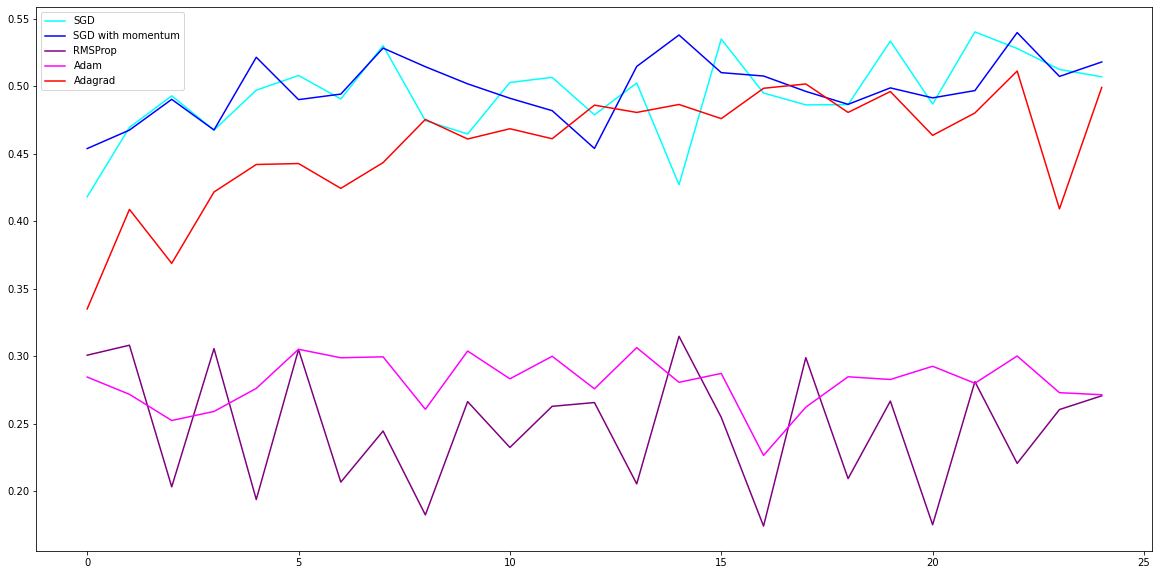

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(SGDaccuracies, label='SGD', color = 'cyan')
plt.plot(SGDMaccuracies, label='SGD with momentum', color = 'blue')
plt.plot(RMSPropaccuracies, label='RMSProp', color = 'purple')
plt.plot(Adamaccuracies, label='Adam', color = 'magenta')
plt.plot(Adagradaccuracies, label='Adagrad', color = 'red')
plt.legend()
plt.show()

Adam и RMSprop показывают довольно плохие результаты, не очень понятно почему. SGD, SGD с ускорением 0.6 и Adagrad показывают результаты намного лучше, где-то на 10 эпохе сравниваются, но потом немного скачут (возможно связано с тем, что градиентный спуск например в Adagrad может все-таки уходить не туда из-за своего шага). В этот раз лучший результат у SGD, accuracy = 0.5404, у SGD с ускорением сравнимый разультат, accuracy = 0.5399.
Далее можно сравнить несколько значений momentum у SGD.

In [25]:
# зададим ускорения 0.1, 0.3, 0.5, 0.7 и 0.9
model = TwoLayerFCNUpgrade(10, 700) 
model.train()

# By default cross-entropy loss used, you can change it to another loss function
criterion = nn.CrossEntropyLoss() 

# You can change learning rate and number of epoch too
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum = 0.1) 
SGD1accuracies = []
SGD1best = 0

for epoch in range(25):
  for img_batch, labels_batch in train_loader:
    
    output = model(img_batch)
    loss = criterion(output, labels_batch)
    # Get the grad and update model weights: https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#backprop
    
    # Put your code here
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

  accuracy = validate(model,test_loader)
  if accuracy > SGD1best:
    SGD1best = accuracy
  SGD1accuracies.append(accuracy)
  print("Epoch {} Loss {:.2f} Accuracy {:.2f}".format(epoch,loss.item(),accuracy))
print("Best for SGD with momentum = 0.1 {}".format(SGD1best))

Epoch 0 Loss 1.69 Accuracy 0.44
Epoch 1 Loss 1.40 Accuracy 0.46
Epoch 2 Loss 1.48 Accuracy 0.48
Epoch 3 Loss 1.31 Accuracy 0.50
Epoch 4 Loss 1.37 Accuracy 0.47
Epoch 5 Loss 1.38 Accuracy 0.50
Epoch 6 Loss 1.32 Accuracy 0.52
Epoch 7 Loss 1.30 Accuracy 0.50
Epoch 8 Loss 1.75 Accuracy 0.46
Epoch 9 Loss 1.20 Accuracy 0.50
Epoch 10 Loss 1.10 Accuracy 0.51
Epoch 11 Loss 1.25 Accuracy 0.49
Epoch 12 Loss 1.29 Accuracy 0.47
Epoch 13 Loss 1.17 Accuracy 0.51
Epoch 14 Loss 1.22 Accuracy 0.49
Epoch 15 Loss 1.29 Accuracy 0.47
Epoch 16 Loss 0.95 Accuracy 0.52
Epoch 17 Loss 1.23 Accuracy 0.49
Epoch 18 Loss 1.14 Accuracy 0.52
Epoch 19 Loss 0.81 Accuracy 0.52
Epoch 20 Loss 1.06 Accuracy 0.50
Epoch 21 Loss 0.98 Accuracy 0.52
Epoch 22 Loss 1.04 Accuracy 0.52
Epoch 23 Loss 0.94 Accuracy 0.54
Epoch 24 Loss 0.94 Accuracy 0.51
Best for SGD with momentum = 0.1 0.5371


In [26]:
model = TwoLayerFCNUpgrade(10, 700) 
model.train()

# By default cross-entropy loss used, you can change it to another loss function
criterion = nn.CrossEntropyLoss() 

# You can change learning rate and number of epoch too
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum = 0.3) 
SGD3accuracies = []
SGD3best = 0

for epoch in range(25):
  for img_batch, labels_batch in train_loader:
    
    output = model(img_batch)
    loss = criterion(output, labels_batch)
    # Get the grad and update model weights: https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#backprop
    
    # Put your code here
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

  accuracy = validate(model,test_loader)
  if accuracy > SGD3best:
    SGD3best = accuracy
  SGD3accuracies.append(accuracy)
  print("Epoch {} Loss {:.2f} Accuracy {:.2f}".format(epoch,loss.item(),accuracy))
print("Best for SGD with momentum = 0.3 {}".format(SGD3best))

Epoch 0 Loss 1.54 Accuracy 0.44
Epoch 1 Loss 1.52 Accuracy 0.47
Epoch 2 Loss 1.60 Accuracy 0.46
Epoch 3 Loss 1.31 Accuracy 0.49
Epoch 4 Loss 1.29 Accuracy 0.51
Epoch 5 Loss 1.19 Accuracy 0.51
Epoch 6 Loss 1.38 Accuracy 0.50
Epoch 7 Loss 1.11 Accuracy 0.50
Epoch 8 Loss 1.33 Accuracy 0.48
Epoch 9 Loss 1.16 Accuracy 0.51
Epoch 10 Loss 1.16 Accuracy 0.50
Epoch 11 Loss 1.04 Accuracy 0.52
Epoch 12 Loss 1.04 Accuracy 0.52
Epoch 13 Loss 1.15 Accuracy 0.50
Epoch 14 Loss 1.03 Accuracy 0.50
Epoch 15 Loss 1.08 Accuracy 0.50
Epoch 16 Loss 0.99 Accuracy 0.51
Epoch 17 Loss 0.95 Accuracy 0.49
Epoch 18 Loss 0.86 Accuracy 0.52
Epoch 19 Loss 0.83 Accuracy 0.52
Epoch 20 Loss 1.91 Accuracy 0.46
Epoch 21 Loss 0.85 Accuracy 0.52
Epoch 22 Loss 1.08 Accuracy 0.48
Epoch 23 Loss 0.76 Accuracy 0.54
Epoch 24 Loss 0.79 Accuracy 0.51
Best for SGD with momentum = 0.3 0.5426


In [27]:
model = TwoLayerFCNUpgrade(10, 700) 
model.train()

# By default cross-entropy loss used, you can change it to another loss function
criterion = nn.CrossEntropyLoss() 

# You can change learning rate and number of epoch too
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum = 0.5) 
SGD5accuracies = []
SGD5best = 0

for epoch in range(25):
  for img_batch, labels_batch in train_loader:
    
    output = model(img_batch)
    loss = criterion(output, labels_batch)
    # Get the grad and update model weights: https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#backprop
    
    # Put your code here
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

  accuracy = validate(model,test_loader)
  if accuracy > SGD5best:
    SGD5best = accuracy
  SGD5accuracies.append(accuracy)
  print("Epoch {} Loss {:.2f} Accuracy {:.2f}".format(epoch,loss.item(),accuracy))
print("Best for SGD with momentum = 0.5 {}".format(SGD5best))

Epoch 0 Loss 1.65 Accuracy 0.46
Epoch 1 Loss 1.39 Accuracy 0.47
Epoch 2 Loss 1.40 Accuracy 0.48
Epoch 3 Loss 1.51 Accuracy 0.50
Epoch 4 Loss 1.21 Accuracy 0.50
Epoch 5 Loss 1.27 Accuracy 0.51
Epoch 6 Loss 1.09 Accuracy 0.51
Epoch 7 Loss 1.01 Accuracy 0.51
Epoch 8 Loss 1.16 Accuracy 0.52
Epoch 9 Loss 1.28 Accuracy 0.51
Epoch 10 Loss 1.01 Accuracy 0.52
Epoch 11 Loss 1.30 Accuracy 0.52
Epoch 12 Loss 0.97 Accuracy 0.51
Epoch 13 Loss 1.19 Accuracy 0.51
Epoch 14 Loss 1.01 Accuracy 0.52
Epoch 15 Loss 0.85 Accuracy 0.53
Epoch 16 Loss 0.82 Accuracy 0.51
Epoch 17 Loss 0.90 Accuracy 0.52
Epoch 18 Loss 0.83 Accuracy 0.54
Epoch 19 Loss 1.23 Accuracy 0.46
Epoch 20 Loss 0.76 Accuracy 0.52
Epoch 21 Loss 1.03 Accuracy 0.48
Epoch 22 Loss 1.47 Accuracy 0.47
Epoch 23 Loss 0.64 Accuracy 0.52
Epoch 24 Loss 0.61 Accuracy 0.53
Best for SGD with momentum = 0.5 0.5359


In [28]:
# зададим ускорения 0.1, 0.3, 0.5, 0.7 и 0.9
model = TwoLayerFCNUpgrade(10, 700) 
model.train()

# By default cross-entropy loss used, you can change it to another loss function
criterion = nn.CrossEntropyLoss() 

# You can change learning rate and number of epoch too
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum = 0.7) 
SGD7accuracies = []
SGD7best = 0

for epoch in range(25):
  for img_batch, labels_batch in train_loader:
    
    output = model(img_batch)
    loss = criterion(output, labels_batch)
    # Get the grad and update model weights: https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#backprop
    
    # Put your code here
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

  accuracy = validate(model,test_loader)
  if accuracy > SGD7best:
    SGD7best = accuracy
  SGD7accuracies.append(accuracy)
  print("Epoch {} Loss {:.2f} Accuracy {:.2f}".format(epoch,loss.item(),accuracy))
print("Best for SGD with momentum = 0.7 {}".format(SGD7best))

Epoch 0 Loss 1.46 Accuracy 0.44
Epoch 1 Loss 1.48 Accuracy 0.49
Epoch 2 Loss 1.34 Accuracy 0.49
Epoch 3 Loss 1.28 Accuracy 0.51
Epoch 4 Loss 1.26 Accuracy 0.49
Epoch 5 Loss 1.08 Accuracy 0.51
Epoch 6 Loss 1.26 Accuracy 0.51
Epoch 7 Loss 1.09 Accuracy 0.49
Epoch 8 Loss 1.18 Accuracy 0.51
Epoch 9 Loss 1.35 Accuracy 0.45
Epoch 10 Loss 0.85 Accuracy 0.52
Epoch 11 Loss 1.17 Accuracy 0.51
Epoch 12 Loss 0.96 Accuracy 0.52
Epoch 13 Loss 0.96 Accuracy 0.53
Epoch 14 Loss 1.05 Accuracy 0.52
Epoch 15 Loss 1.05 Accuracy 0.52
Epoch 16 Loss 0.85 Accuracy 0.51
Epoch 17 Loss 0.95 Accuracy 0.52
Epoch 18 Loss 0.81 Accuracy 0.51
Epoch 19 Loss 0.85 Accuracy 0.51
Epoch 20 Loss 0.80 Accuracy 0.50
Epoch 21 Loss 0.96 Accuracy 0.46
Epoch 22 Loss 0.68 Accuracy 0.50
Epoch 23 Loss 0.78 Accuracy 0.51
Epoch 24 Loss 3.36 Accuracy 0.44
Best for SGD with momentum = 0.7 0.5259


In [29]:
model = TwoLayerFCNUpgrade(10, 700) 
model.train()

# By default cross-entropy loss used, you can change it to another loss function
criterion = nn.CrossEntropyLoss() 

# You can change learning rate and number of epoch too
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum = 0.9) 
SGD9accuracies = []
SGD9best = 0

for epoch in range(25):
  for img_batch, labels_batch in train_loader:
    
    output = model(img_batch)
    loss = criterion(output, labels_batch)
    # Get the grad and update model weights: https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#backprop
    
    # Put your code here
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() 

  accuracy = validate(model,test_loader)
  if accuracy > SGD9best:
    SGD9best = accuracy
  SGD9accuracies.append(accuracy)
  print("Epoch {} Loss {:.2f} Accuracy {:.2f}".format(epoch,loss.item(),accuracy))
print("Best for SGD with momentum = 0.9 {}".format(SGD9best))

Epoch 0 Loss 170.72 Accuracy 0.14
Epoch 1 Loss 122499325952.00 Accuracy 0.14
Epoch 2 Loss 13032044031587123200.00 Accuracy 0.12
Epoch 3 Loss 11341676886525888257039794176.00 Accuracy 0.18
Epoch 4 Loss inf Accuracy 0.18
Epoch 5 Loss nan Accuracy 0.10
Epoch 6 Loss nan Accuracy 0.10
Epoch 7 Loss nan Accuracy 0.10
Epoch 8 Loss nan Accuracy 0.10
Epoch 9 Loss nan Accuracy 0.10
Epoch 10 Loss nan Accuracy 0.10
Epoch 11 Loss nan Accuracy 0.10
Epoch 12 Loss nan Accuracy 0.10
Epoch 13 Loss nan Accuracy 0.10
Epoch 14 Loss nan Accuracy 0.10
Epoch 15 Loss nan Accuracy 0.10
Epoch 16 Loss nan Accuracy 0.10
Epoch 17 Loss nan Accuracy 0.10
Epoch 18 Loss nan Accuracy 0.10
Epoch 19 Loss nan Accuracy 0.10
Epoch 20 Loss nan Accuracy 0.10
Epoch 21 Loss nan Accuracy 0.10
Epoch 22 Loss nan Accuracy 0.10
Epoch 23 Loss nan Accuracy 0.10
Epoch 24 Loss nan Accuracy 0.10
Best for SGD with momentum = 0.9 0.1806


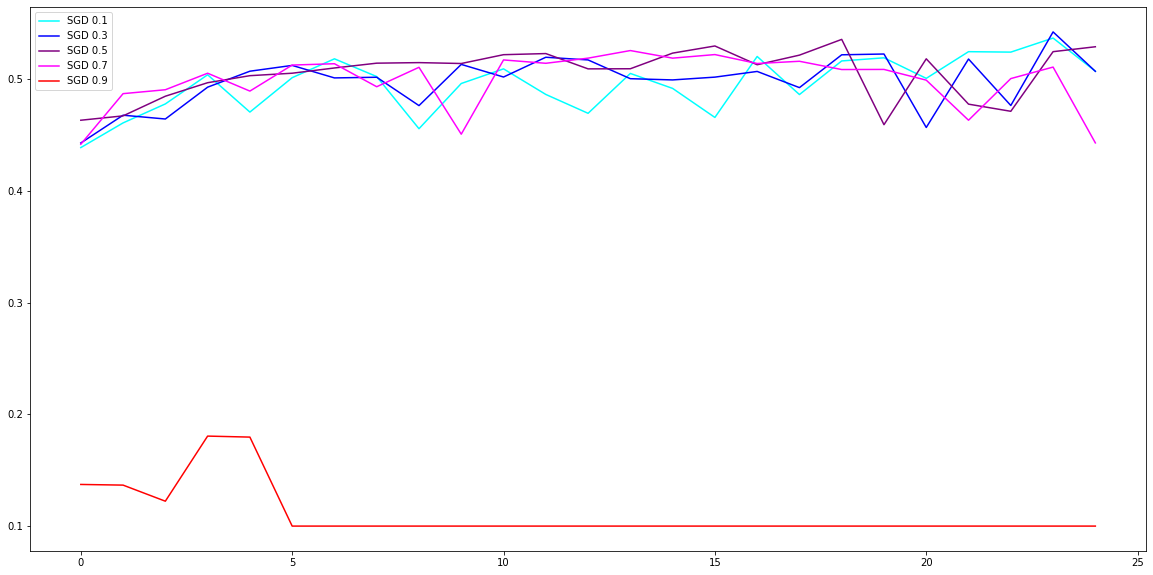

In [30]:
plt.figure(figsize=(20, 10))
plt.plot(SGD1accuracies, label='SGD 0.1', color = 'cyan')
plt.plot(SGD3accuracies, label='SGD 0.3', color = 'blue')
plt.plot(SGD5accuracies, label='SGD 0.5', color = 'purple')
plt.plot(SGD7accuracies, label='SGD 0.7', color = 'magenta')
plt.plot(SGD9accuracies, label='SGD 0.9', color = 'red')
plt.legend()
plt.show()

Наилучший результат 0.5426 у ускорения 0.3. При этом ускорение 0.9 явно все портит. В общем и целом можно сказать, что кажется максимальный результат где-то около 0.55, но опять же, результаты все еще довольно чувствительны к запускам и формируемым подмножествам датасета.